In [518]:
# import the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define a function to strip strings and return only numerical part. This is done to convert '<0.1' strings to '0.1'

def cfun(x):
    if isinstance(x, str):      
        return x[1:].strip()
    else:
        return x



raw_data = pd.read_excel('NYGasolineData_with_date.xlsx')

In [519]:
plt.style.use('classic')
%matplotlib inline

In [520]:
# The columns of the DataFrame
raw_data.columns

Index(['Results', 'Heading', 'SurveyName', 'SurveyInstance', 'Region', 'City',
       'State', 'Season', 'Month Day Year', 'Date', 'Grade', 'Estimated Grade',
       'Posted Octane', 'ResearchOctane', 'MotorOctane',
       'R+M/2-calculated here', 'Date.1', 'R+M/2', 'Benzene', 'Lead',
       'Manganese', 'Aromatics', 'Olefins', 'Saturates', 'Vapor Pressure',
       'APIGravity', 'Specific Gravity', 'MTBE Wt %', 'MTBE Vol %',
       'TAME Wt %', 'TAME Vol %', 'ETBE Wt %', 'ETBE Vol %', 'DIPE Wt %',
       'DIPE Vol %', 'Methanol Wt %', 'Methanol Vol %', 'Ethanol Wt %',
       'Ethanol Vol %', 'T-Butanol Wt %', 'T-Butanol Vol %',
       'Iso-propanol Wt %', 'Iso-propanol Vol %', 'n-Propanol Wt %',
       'n-Propanol Vol %', 'sec-butanol Wt %', 'sec-butanol Vol %',
       'Iso-butanol Wt %', 'Iso-butanol Vol %', 'n-Butanol Wt %',
       'n-Butanol Vol %', 'tert-Pentanol Wt %', 'tert-Pentanol Vol %'],
      dtype='object')

In [521]:
# The columns which have the '<0.1' type strings. These strings will be converted to numeric types by applying 
# the 'cfun' function defined above and to_numeric function. All the '0' values in these columns are converted to nan.
# The 0 values are non-detects and are equivalent to no-data.

colKeys = ['Posted Octane', 'ResearchOctane', 'MotorOctane',
       'R+M/2-calculated here', 'Date.1', 'R+M/2', 'Benzene', 'Lead',
       'Manganese', 'Aromatics', 'Olefins', 'Saturates', 'Vapor Pressure',
       'APIGravity', 'Specific Gravity', 'MTBE Wt %', 'MTBE Vol %',
       'TAME Wt %', 'TAME Vol %', 'ETBE Wt %', 'ETBE Vol %', 'DIPE Wt %',
       'DIPE Vol %', 'Methanol Wt %', 'Methanol Vol %', 'Ethanol Wt %',
       'Ethanol Vol %', 'T-Butanol Wt %', 'T-Butanol Vol %',
       'Iso-propanol Wt %', 'Iso-propanol Vol %', 'n-Propanol Wt %',
       'n-Propanol Vol %', 'sec-butanol Wt %', 'sec-butanol Vol %',
       'Iso-butanol Wt %', 'Iso-butanol Vol %', 'n-Butanol Wt %',
       'n-Butanol Vol %', 'tert-Pentanol Wt %', 'tert-Pentanol Vol %']

raw_data[colKeys] = raw_data[colKeys].apply(cfun)
raw_data[colKeys]= raw_data[colKeys].apply(pd.to_numeric, errors = 'coerce', axis=0)
raw_data[colKeys] = raw_data[colKeys].replace({0:np.nan})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22657 entries, 0 to 22656
Data columns (total 53 columns):
Results                  22657 non-null object
Heading                  22657 non-null int64
SurveyName               22657 non-null object
SurveyInstance           22657 non-null object
Region                   22657 non-null object
City                     22657 non-null object
State                    22657 non-null object
Season                   22657 non-null object
Month Day Year           22657 non-null datetime64[ns]
Date                     22657 non-null float64
Grade                    22657 non-null object
Estimated Grade          22657 non-null object
Posted Octane            972 non-null float64
ResearchOctane           2530 non-null float64
MotorOctane              2530 non-null float64
R+M/2-calculated here    2530 non-null float64
Date.1                   0 non-null float64
R+M/2                    0 non-null float64
Benzene                  21586 non-null floa

In [522]:
# This step removes all the columns with 0 non-null numerics or the columns with no data.

raw_data = raw_data.loc[:,raw_data.any()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22657 entries, 0 to 22656
Data columns (total 45 columns):
Results                  22657 non-null object
Heading                  22657 non-null int64
SurveyName               22657 non-null object
SurveyInstance           22657 non-null object
Region                   22657 non-null object
City                     22657 non-null object
State                    22657 non-null object
Season                   22657 non-null object
Month Day Year           22657 non-null datetime64[ns]
Date                     22657 non-null float64
Grade                    22657 non-null object
Estimated Grade          22657 non-null object
Posted Octane            972 non-null float64
ResearchOctane           2530 non-null float64
MotorOctane              2530 non-null float64
R+M/2-calculated here    2530 non-null float64
Benzene                  21586 non-null float64
Lead                     604 non-null float64
Manganese                17 non-null f

In [523]:
# This step was to detect if there were any rows with unwanted data as there only should be two seasons.
raw_data['Season'].value_counts()

Summer    18294
Winter     4363
Name: Season, dtype: int64

In [524]:
# Set datetime index 
raw_data.set_index('Month Day Year', inplace=True)

In [525]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22657 entries, 1976-06-15 to 1980-06-15
Data columns (total 44 columns):
Results                  22657 non-null object
Heading                  22657 non-null int64
SurveyName               22657 non-null object
SurveyInstance           22657 non-null object
Region                   22657 non-null object
City                     22657 non-null object
State                    22657 non-null object
Season                   22657 non-null object
Date                     22657 non-null float64
Grade                    22657 non-null object
Estimated Grade          22657 non-null object
Posted Octane            972 non-null float64
ResearchOctane           2530 non-null float64
MotorOctane              2530 non-null float64
R+M/2-calculated here    2530 non-null float64
Benzene                  21586 non-null float64
Lead                     604 non-null float64
Manganese                17 non-null float64
Aromatics                21139 

In [565]:
# Create a list of all the columns with numeric datatypes in the data frame. Remove 'Date' column from the list because
# we dont need to plot 'Date'. The number of columns in the list helps to set up the plots below.

num_col = raw_data.select_dtypes(include=['float64']).columns.tolist()
num_col.remove('Date')
np.shape(num_col)

(33,)

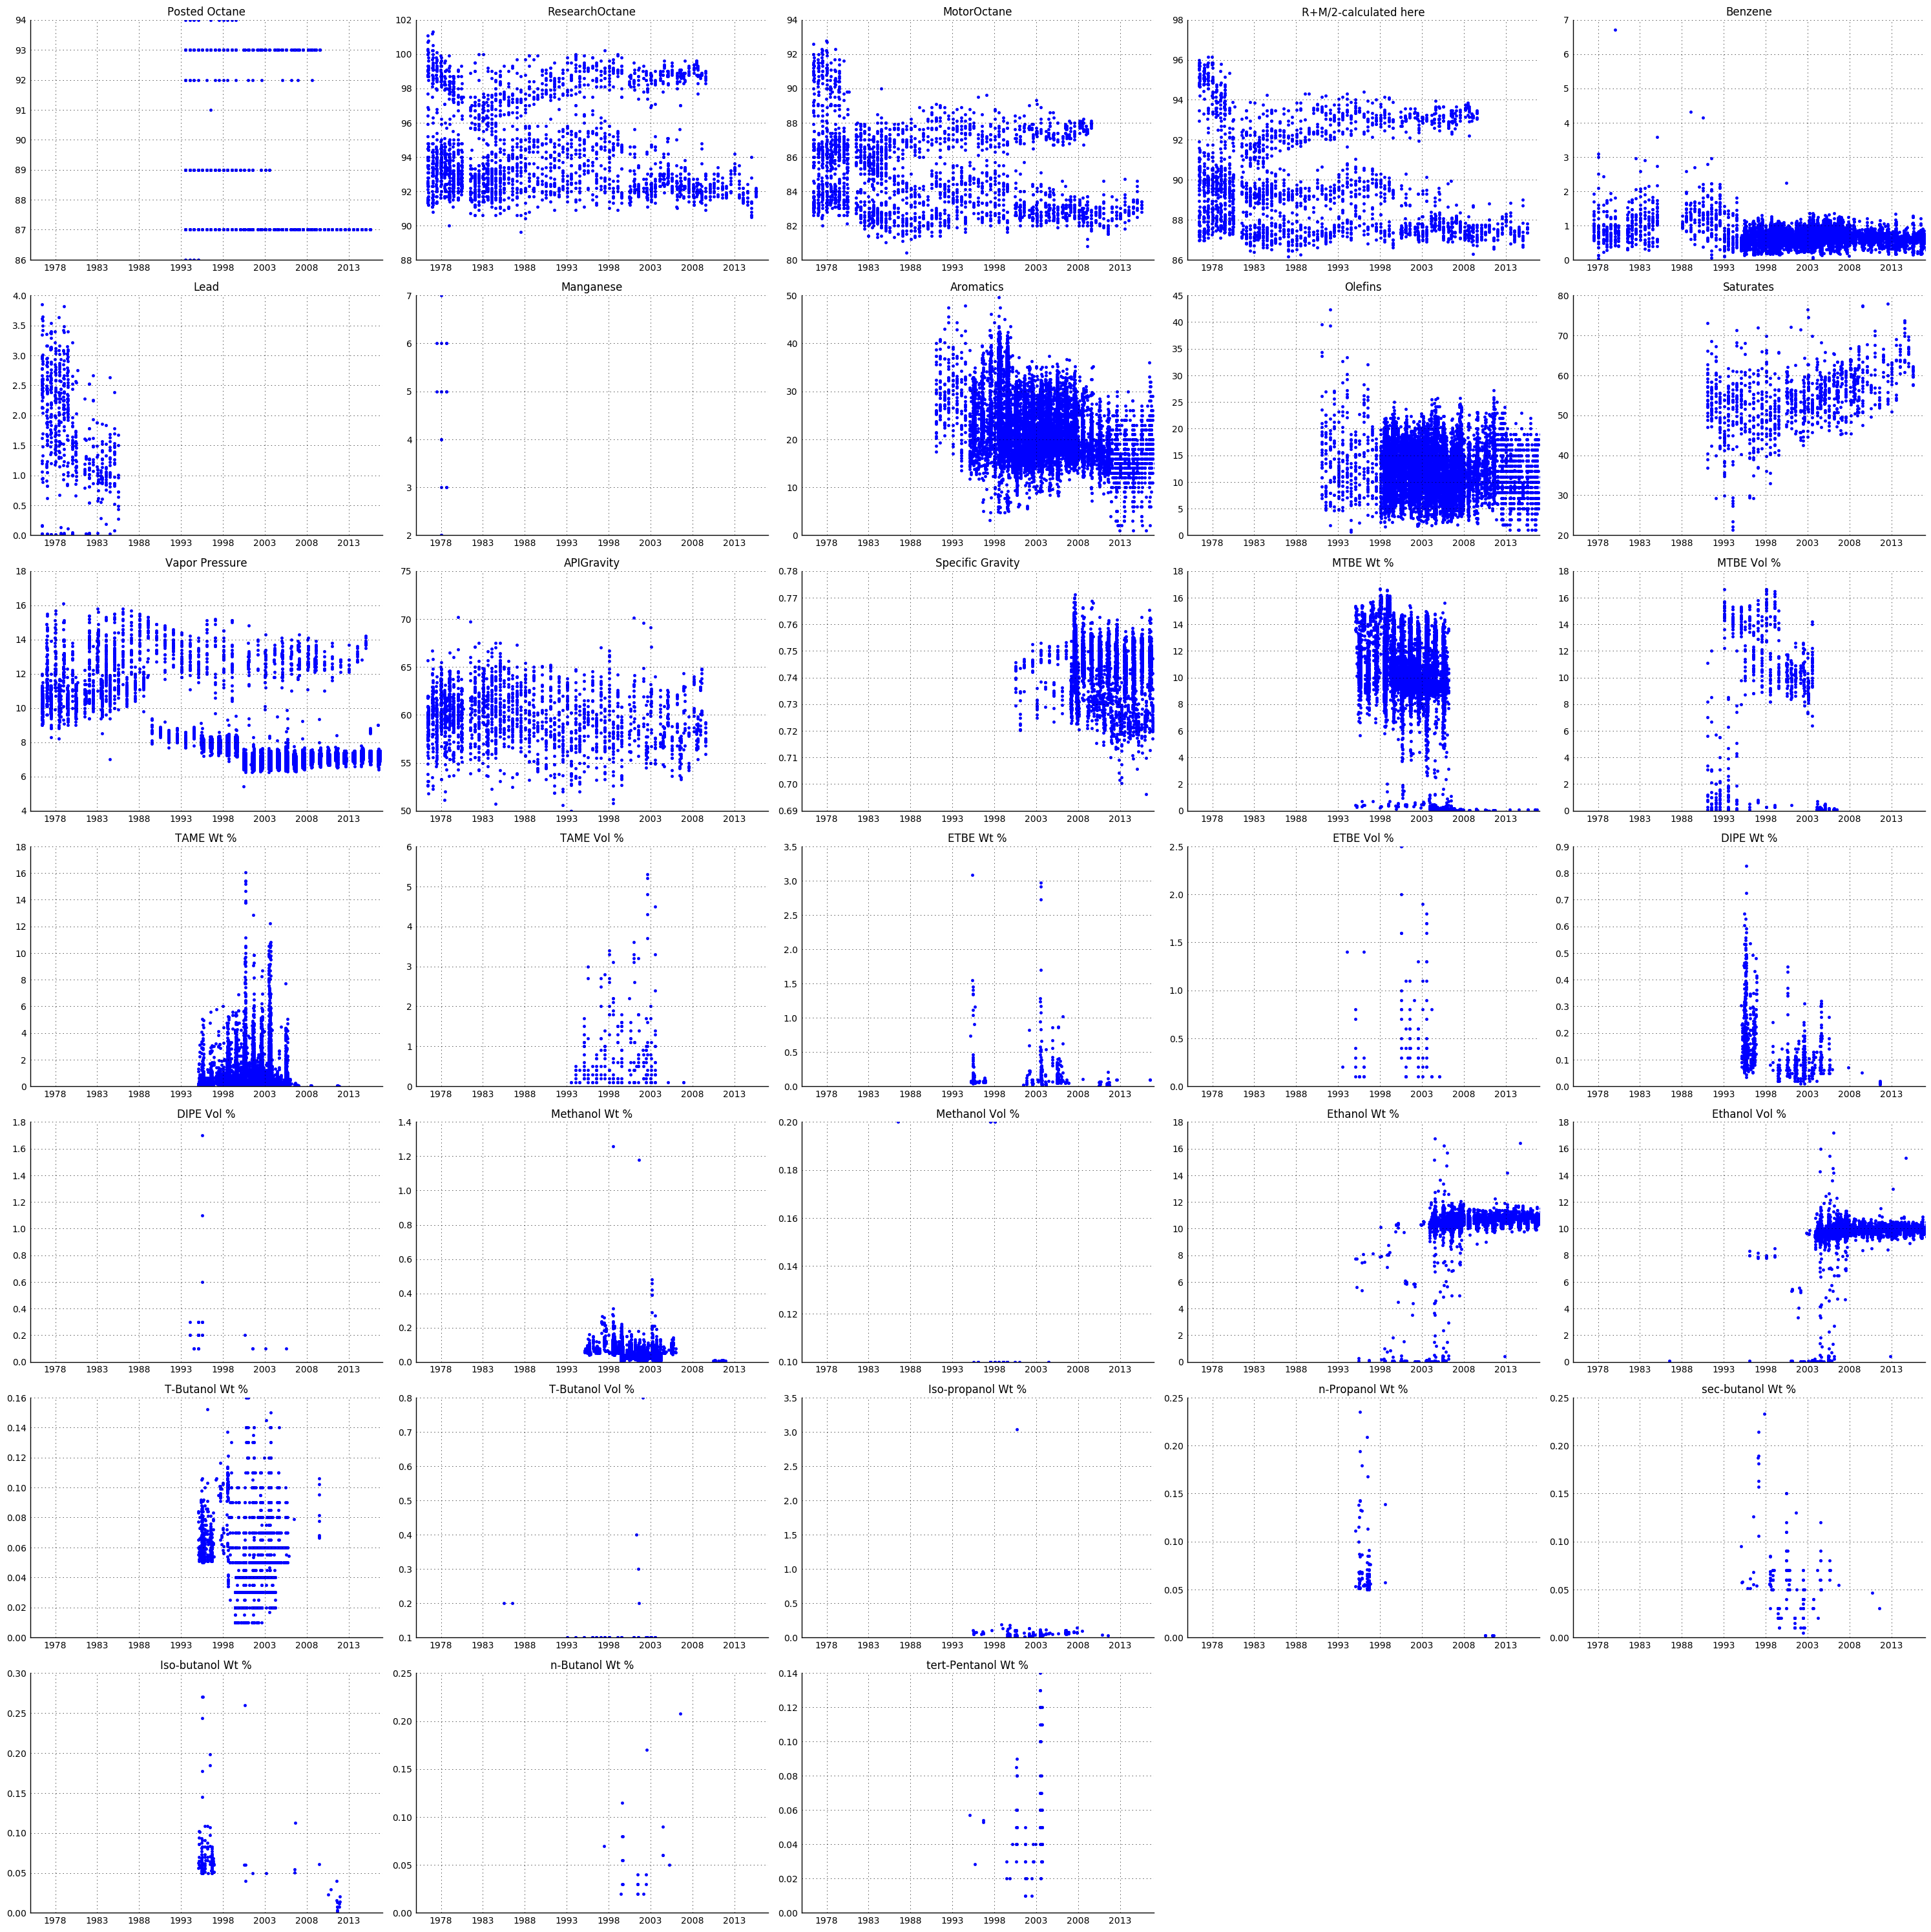

In [567]:
# Plot all the data to examine and visualize it.

fig, axes = plt.subplots(nrows = 7, ncols=5, figsize=(30,30))
axes_list = [item for sublist in axes for item in sublist]

for chem in num_col:
    ax = axes_list.pop(0)
    ax.plot(raw_data[chem], marker='.', linestyle='none')
    ax.set_title(chem)
    
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.set_xlim(['1975','2017'])
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)

for ax in axes_list:
        ax.remove()
    
plt.tight_layout()    
plt.show()

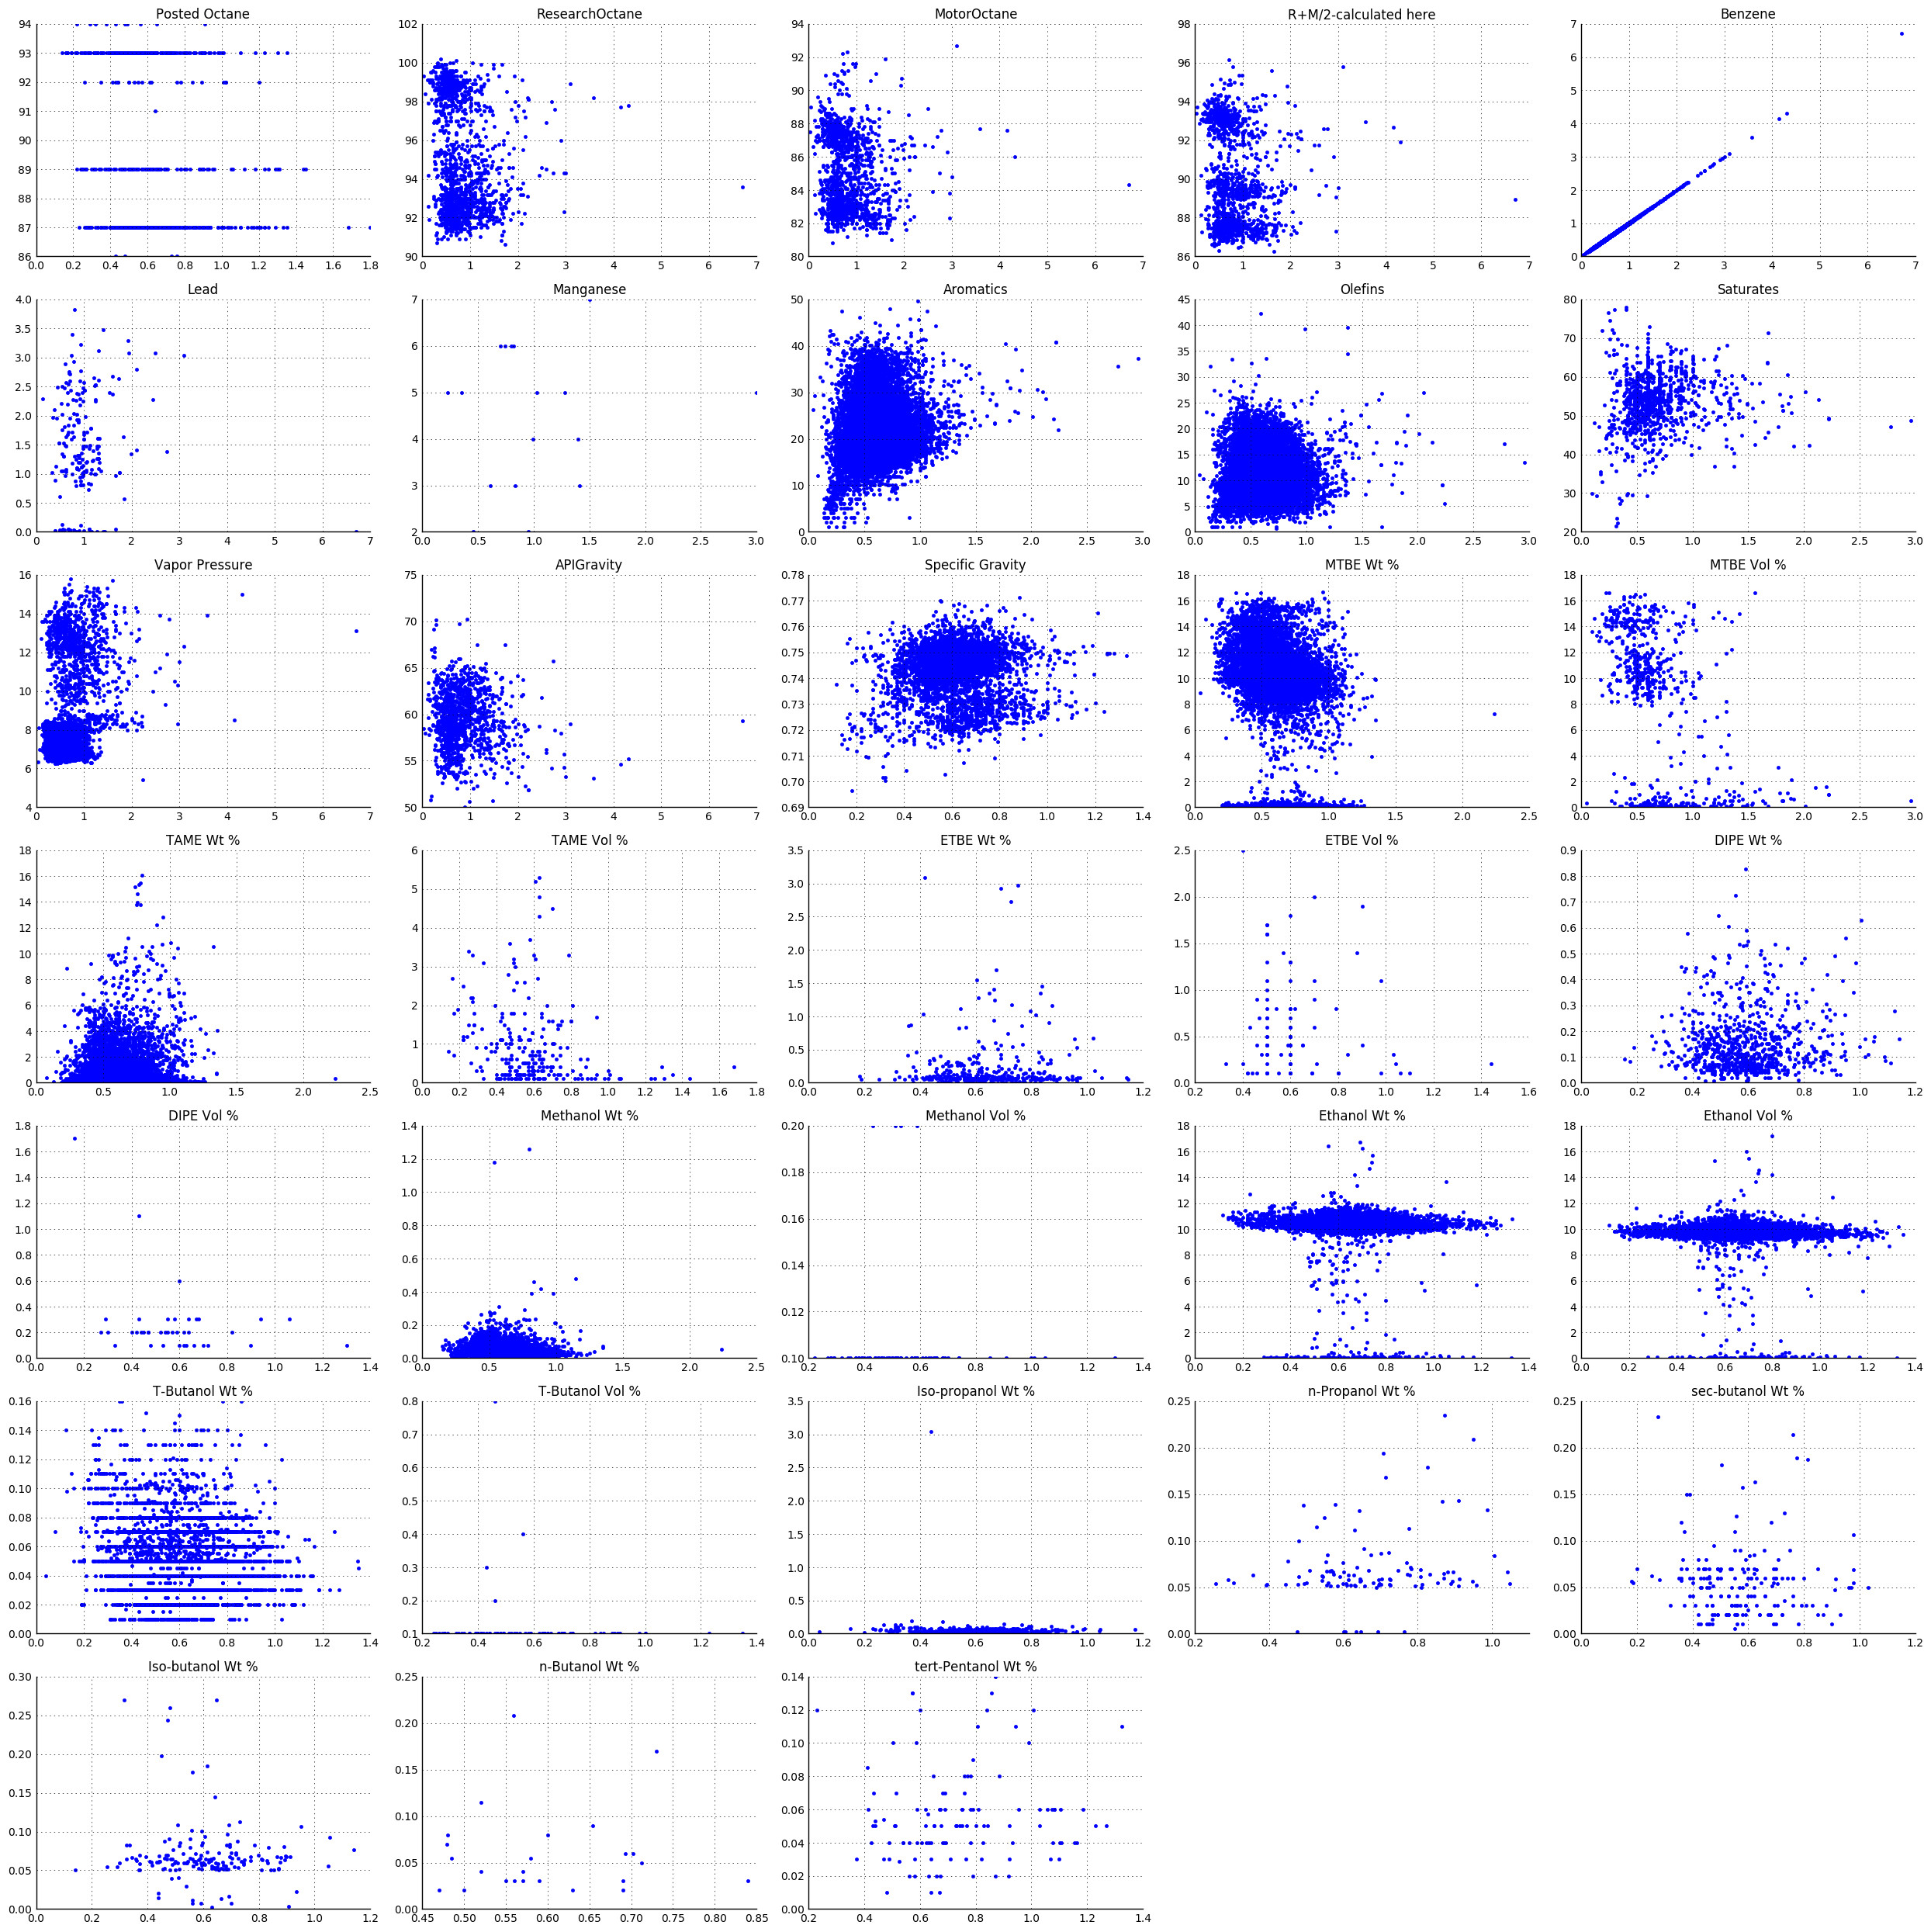

In [570]:
fig, axes = plt.subplots(nrows = 7, ncols=5, figsize=(25,25))
axes_list = [item for sublist in axes for item in sublist]

for chem in num_col:
    ax = axes_list.pop(0)
    ax.plot(raw_data['Benzene'],raw_data[chem], marker='.', linestyle='none')
    ax.set_title(chem)
    
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    #ax.set_xlim([])
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)

for ax in axes_list:
        ax.remove()
    
plt.tight_layout()    
plt.show()

In [575]:
ben_corr = raw_data[num_col].corr(method='pearson')
ben_corr['Benzene']

Posted Octane           -0.191778
ResearchOctane          -0.111112
MotorOctane             -0.064865
R+M/2-calculated here   -0.093546
Benzene                  1.000000
Lead                     0.038835
Manganese                0.117558
Aromatics                0.125557
Olefins                 -0.024189
Saturates                0.073949
Vapor Pressure           0.271676
APIGravity              -0.057071
Specific Gravity         0.053555
MTBE Wt %               -0.276681
MTBE Vol %              -0.468130
TAME Wt %                0.126105
TAME Vol %              -0.224375
ETBE Wt %                0.040289
ETBE Vol %              -0.103169
DIPE Wt %                0.044105
DIPE Vol %              -0.331996
Methanol Wt %           -0.071572
Methanol Vol %          -0.031656
Ethanol Wt %            -0.034248
Ethanol Vol %           -0.066753
T-Butanol Wt %          -0.068248
T-Butanol Vol %         -0.074401
Iso-propanol Wt %       -0.055145
n-Propanol Wt %          0.207082
sec-butanol Wt

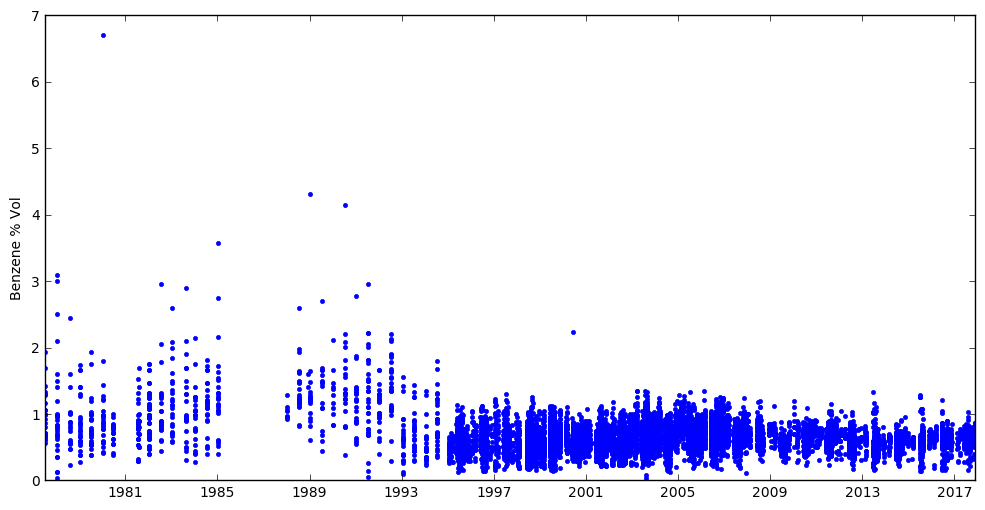

In [576]:
# Plot Benzene concentration
plt.figure(figsize=(12,6))
plt.plot(raw_data.Benzene, marker='.', linestyle='none')
plt.ylabel('Benzene % Vol')
plt.show()

I am only using data from 1995 through 2017 in this project. This is because of the regulatory requirements which limited
The benzene to 1-1.3% after 1995. Here I examine the data, and mean, maximum and minimum of every 6 months of data
The plot shows that the mean data oscillates around 0.6, The max oscillates around 1.3 and minimum oscillates very close to zero. 

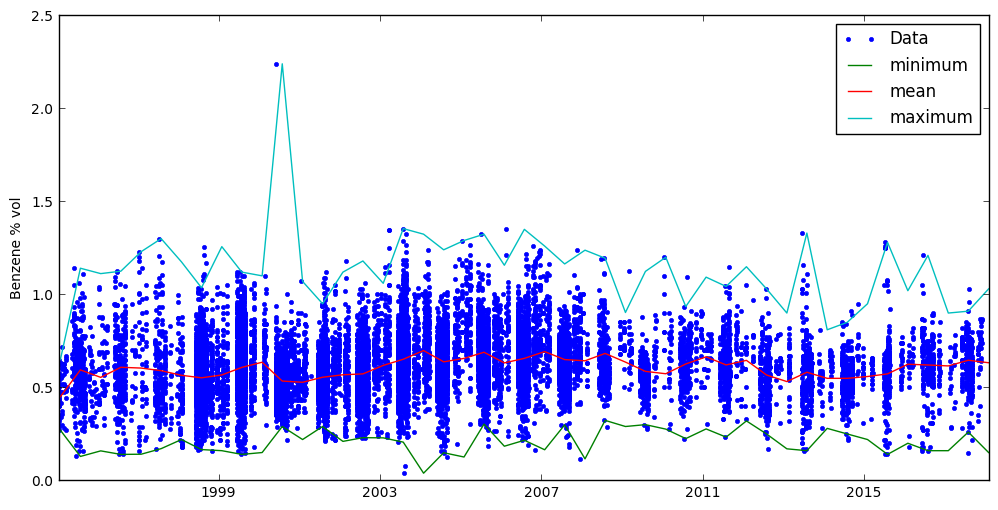

In [529]:
Ben_all_Data = raw_data.Benzene['1995':'2017']
low_data = Ben_all_Data.resample('6M').min()
mean_data = Ben_all_Data.resample('6M').mean()
high_data = Ben_all_Data.resample('6M').max()

plt.figure(figsize=(12,6))
plt.plot(Ben_all_Data,marker='.',linestyle='none',label='Data')
plt.plot(low_data, label='minimum')
plt.plot(mean_data, label ='mean')
plt.plot(high_data, label = 'maximum')
plt.ylabel('Benzene % vol')
plt.legend(loc='best')

Either mean or median can be used to build the models.Usually mean is used but median may be tter choice if thre are too many outliers skewing the mean
The plot of mean/median below shows that the mean and median are fairly close. So,monthly mean data will be used to buid the models.


(0.2, 1)

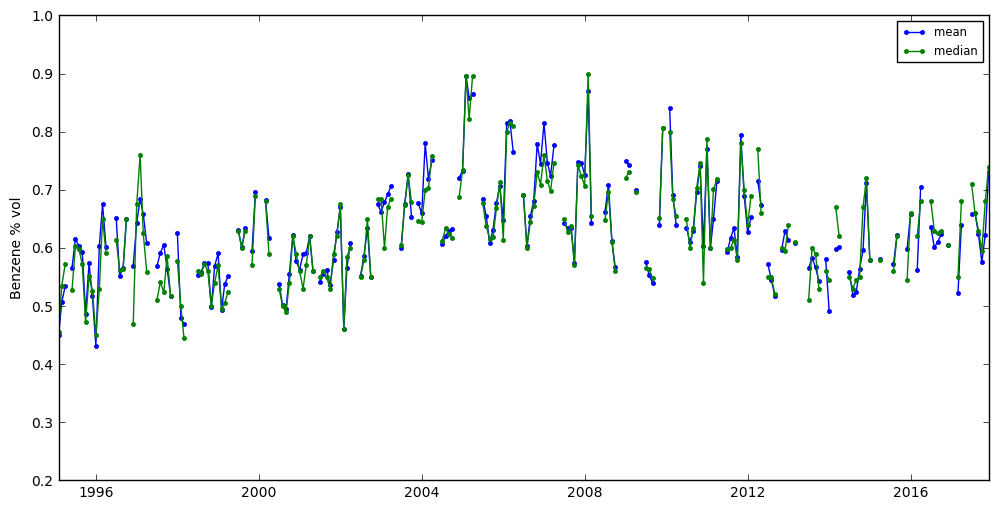

In [530]:
Ben_model_Data1 =  Ben_all_Data.resample('M').mean()
Ben_model_Data2 =  Ben_all_Data.resample('M').median()

plt.figure(figsize=(12,6))
plt.plot(Ben_model_Data1,marker='.' ,label='mean')
plt.plot(Ben_model_Data2,marker='.', label = 'median')
plt.ylabel('Benzene % vol')
plt.legend(loc='upper right',fontsize='small')
plt.ylim(0.2,1)

The plot above shows that there are missing data. The missing data is filled with 'bfill' method and plotted below

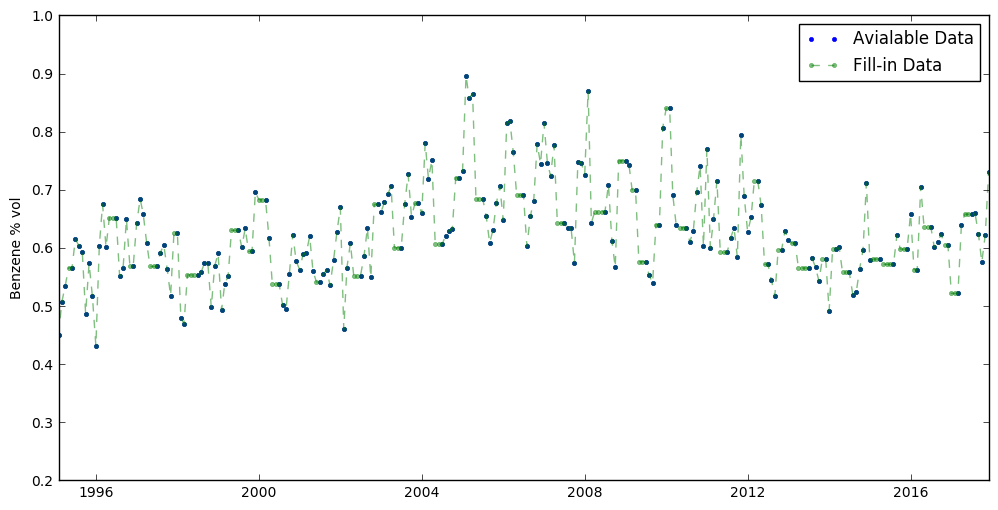

In [531]:
Ben_model_Data =  Ben_model_Data1.fillna(method='bfill')
plt.figure(figsize=(12,6))
plt.plot(Ben_model_Data1,marker='.',linestyle='none',label='Avialable Data')
plt.plot(Ben_model_Data,marker='.',linestyle='--',alpha=0.5, label='Fill-in Data')
plt.ylim(0.2,1)
plt.ylabel('Benzene % vol')
plt.legend(loc='upper right')

In [578]:
print(Ben_model_Data1.describe())
print(Ben_model_Data.describe())
print(100*73/275)

count    202.000000
mean       0.628461
std        0.084579
min        0.431556
25%        0.570014
50%        0.617065
75%        0.676212
max        0.895909
Name: Benzene, dtype: float64
count    275.000000
mean       0.625121
std        0.079096
min        0.431556
25%        0.568998
50%        0.610333
75%        0.671458
max        0.895909
Name: Benzene, dtype: float64
26.545454545454547


The Data is split into train data and test data. The data between 1995 and 2010 will be used to train the models and  data
after 2011 will be used to test the models.

In [532]:
Ben_train_Data = Ben_model_Data['1995':'2010']
Ben_test_Data = Ben_model_Data['2011':'2017']

In [533]:
y_hat_avg = Ben_test_Data.copy()

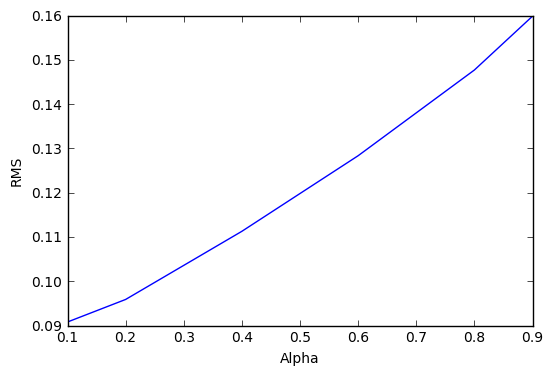

In [534]:
#Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt

alpha = [0.1,0.2,0.4,0.6,0.8,0.9]
RMS = []
for i in alpha:
    tModel = SimpleExpSmoothing(np.asarray(Ben_train_Data)).fit(smoothing_level=i,optimized=False)
    y_hat_avg= tModel.forecast(len(Ben_test_Data))
    rms = sqrt(mean_squared_error(Ben_test_Data, y_hat_avg))
    RMS.append(rms)
plt.plot(alpha,RMS)
plt.xlabel('Alpha')
plt.ylabel('RMS')

In [535]:
tModel = SimpleExpSmoothing(np.asarray(Ben_train_Data)).fit(smoothing_level=0.1,optimized=False)
y_hat_avg= tModel.forecast(len(Ben_test_Data))
print(y_hat_avg.mean())

0.6772554099541425


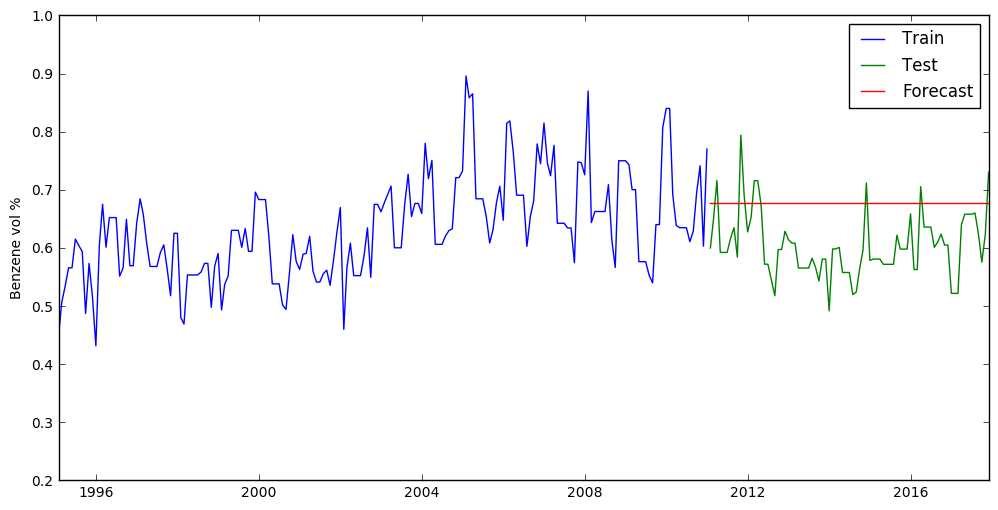

In [536]:
plt.figure(figsize=(12,6))
plt.plot(Ben_train_Data,label='Train')
plt.plot(Ben_test_Data,label='Test')
plt.plot(Ben_test_Data.index,y_hat_avg, label='Forecast')
plt.ylim(0.2,1)
plt.ylabel('Benzene vol %')
plt.legend(loc='upper right')

In [537]:
rms = sqrt(mean_squared_error(Ben_test_Data, y_hat_avg))
print(rms)

0.09079082215027072


The Simple Exponenetial model was evaluated using the Root mean square metric. The value of smoothing level parameter 
which produced least rms was 0.1. The model produced rms of 0.09 and mean benzene concentration of about 0.67 %.

In [538]:
# Holt linear trend model

tHtModel = Holt(np.asarray(Ben_train_Data)).fit(smoothing_level=0.1,optimized=True)
y_hat_avg1= tHtModel.forecast(len(Ben_test_Data))
print(y_hat_avg1.mean())

0.7128002155213226


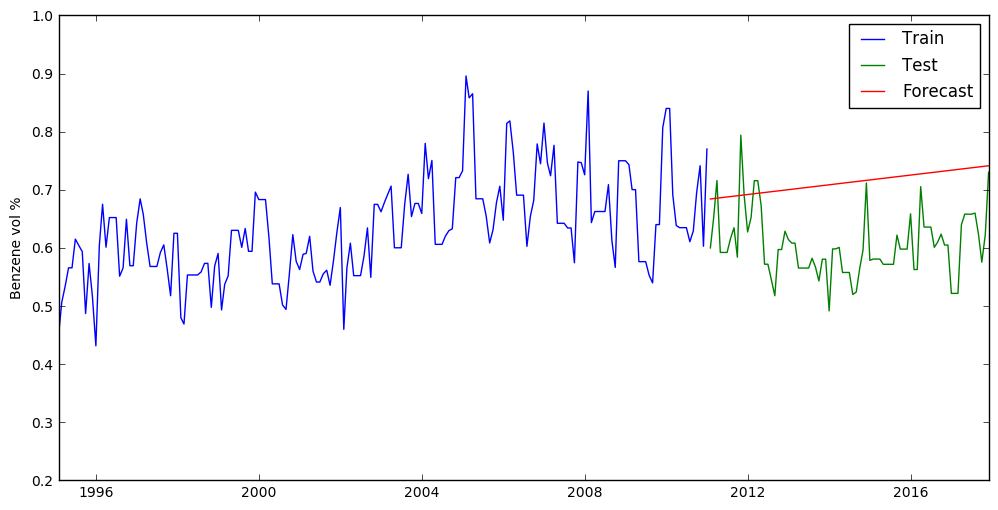

In [539]:
plt.figure(figsize=(12,6))
plt.plot(Ben_train_Data,label='Train')
plt.plot(Ben_test_Data,label='Test')
plt.plot(Ben_test_Data.index,y_hat_avg1, label='Forecast')
plt.ylim(0.2,1)
plt.ylabel('Benzene vol %')
plt.legend(loc='upper right')

In [540]:
rms = sqrt(mean_squared_error(Ben_test_Data, y_hat_avg1))
print(rms)
tHtModel.params

0.12278438823200329


{'damping_slope': nan,
 'initial_level': 0.5497113874763883,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 0.0006969569689142104,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.1,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

The Holts trend model was defined with smoothing levelof 0.1. Other parameters of the model were optimized by the algorithm
This model predicted a increasing trend. The RMS of the model was 0.12. The parameters of model are shown above.

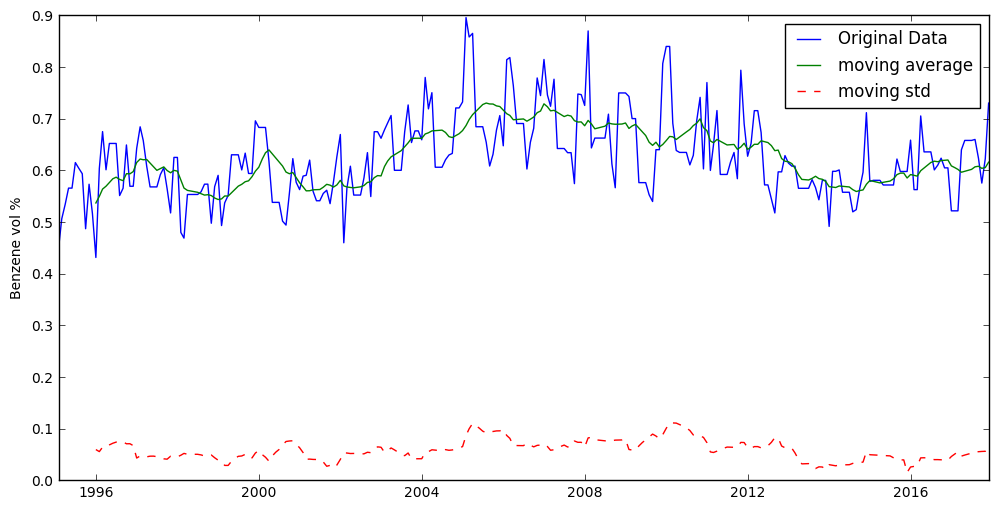

In [541]:
#SARIMAX model
plt.figure(figsize=(12,6))
plt.plot(Ben_model_Data,label='Original Data')
plt.plot(Ben_model_Data.rolling(window=12).mean(),label='moving average')
plt.plot(Ben_model_Data.rolling(window=12).std(),label='moving std',linestyle='--')
plt.ylabel('Benzene vol %')
plt.legend(loc='upper right')

The plot above shows annual moving averages and standard deviations of the benzene data. This suggests non-stationarity
of the data.

In [542]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Ben_model_Data)

print('The test statistic: {}'.format(result[0]))
print('The p_value: {}'.format(result[1]))

for key,value in result[4].items():
    print(key,value)

The test statistic: -2.125702512672792
The p_value: 0.23430585817024308
1% -3.4554613060274972
5% -2.8725931472675046
10% -2.5726600403359887


The adfuller test shows that the test statistics is greater thatn the even the 10% critical value. The p-value and the test 
statistic value also show that the data is non stationary. 

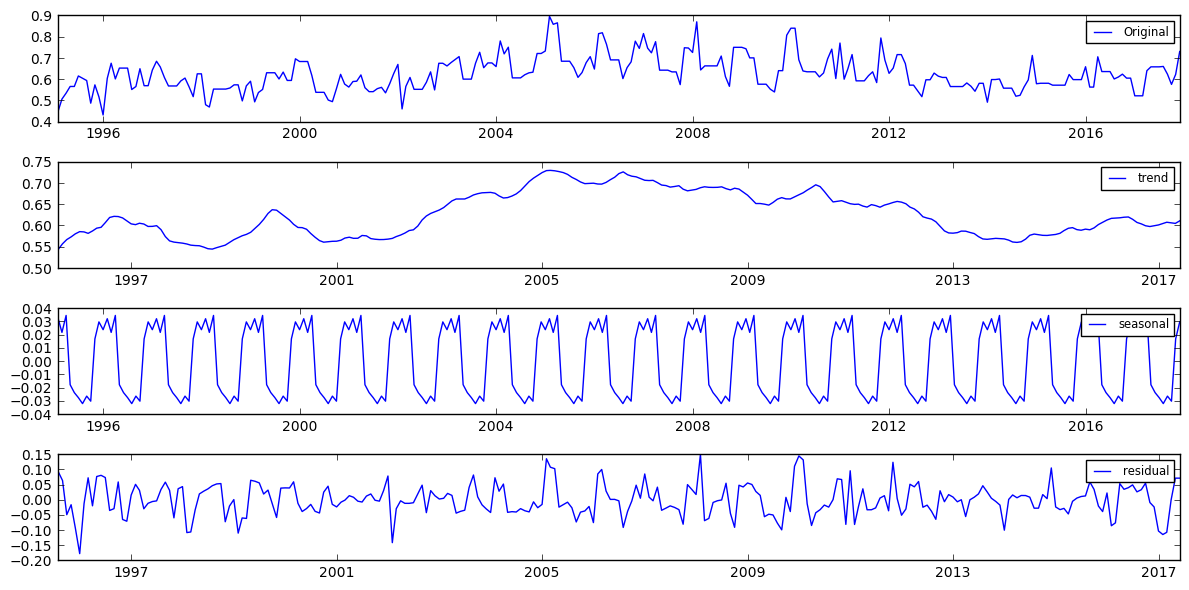

In [543]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Ben_model_Data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(Ben_model_Data, label='Original')
plt.legend(loc='upper right',fontsize='small')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='upper right',fontsize='small')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='upper right',fontsize='small')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='upper right',fontsize='small')

plt.tight_layout()

The decomposition plot shows a increasing trend after 2001 unitl 2010. A decreasing trend is seen after 2010. The seasonality
plot also shows strong seasonal pattern.

In [544]:
from statsmodels.tsa.stattools import acf, pacf

In [545]:
lag_acf = acf(Ben_model_Data, nlags=20)
lag_pacf = pacf(Ben_model_Data,nlags=20,method='ols')


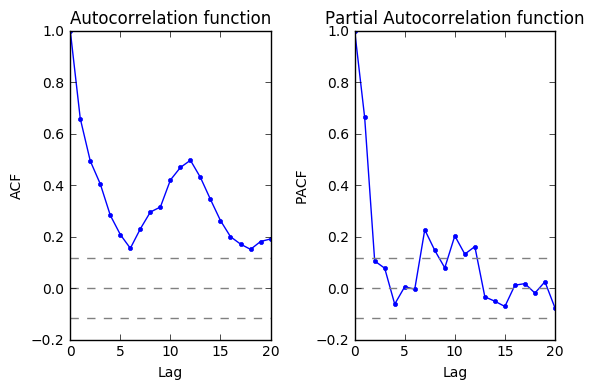

In [546]:
plt.subplot(121)
plt.plot(lag_acf,marker='.')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Ben_model_Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Ben_model_Data)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation function')

plt.subplot(122)
plt.plot(lag_pacf,marker='.')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Ben_model_Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Ben_model_Data)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation function')

plt.tight_layout()

The acf plot and pacf plots both are somewhat sinusodial. The autocorrelation receds very slowly and get close to a non-stationarity around lag 6.  This suggests a seasonal ARIMA maight be a better choice siwth seasonality of 6.

In [547]:
import statsmodels.api as sm
import warnings
import itertools

In [548]:
#Define the p,d,q parameters to take any value between 0 and 2
p = d = q = range(0,2)

#Generate all different combinations of p,d and q
pdq = list(itertools.product(p,d,q))

#Generate all different combinations of seasonal p,d and q triplets
seasonal_pdq =[(x[0],x[1], x[2],6) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA..')
print('SARIMAX: {}x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {}x{}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {}x{}'.format(pdq[3],seasonal_pdq[3]))


Examples of parameter combinations for Seasonal ARIMA..
SARIMAX: (0, 0, 1)x(0, 0, 1, 6)
SARIMAX: (0, 1, 0)x(0, 1, 0, 6)
SARIMAX: (0, 1, 1)x(0, 1, 1, 6)


In [549]:
warnings.filterwarnings("ignore")  #ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(Ben_model_Data,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        
        except:
            continue
            

SARIMAX(0, 0, 0)x(0, 0, 0, 6) - AIC:526.9474707366077
SARIMAX(0, 0, 0)x(0, 0, 1, 6) - AIC:268.42614876959635
SARIMAX(0, 0, 0)x(0, 1, 0, 6) - AIC:-459.88308671473897
SARIMAX(0, 0, 0)x(0, 1, 1, 6) - AIC:-610.2559527261866
SARIMAX(0, 0, 0)x(1, 0, 0, 6) - AIC:-459.31054674004304
SARIMAX(0, 0, 0)x(1, 0, 1, 6) - AIC:-620.5341641399833
SARIMAX(0, 0, 0)x(1, 1, 0, 6) - AIC:-640.9697473133078
SARIMAX(0, 0, 0)x(1, 1, 1, 6) - AIC:-647.8025230913447
SARIMAX(0, 0, 1)x(0, 0, 0, 6) - AIC:189.20655060547574
SARIMAX(0, 0, 1)x(0, 0, 1, 6) - AIC:-28.319371020647594
SARIMAX(0, 0, 1)x(0, 1, 0, 6) - AIC:-528.0876351430163
SARIMAX(0, 0, 1)x(0, 1, 1, 6) - AIC:-679.9780804328294
SARIMAX(0, 0, 1)x(1, 0, 0, 6) - AIC:-531.4646500502893
SARIMAX(0, 0, 1)x(1, 0, 1, 6) - AIC:-691.3331896096703
SARIMAX(0, 0, 1)x(1, 1, 0, 6) - AIC:-685.4017427146691
SARIMAX(0, 0, 1)x(1, 1, 1, 6) - AIC:-698.8893918252359
SARIMAX(0, 1, 0)x(0, 0, 0, 6) - AIC:-721.9657017294421
SARIMAX(0, 1, 0)x(0, 0, 1, 6) - AIC:-707.4705159205691
SARIMAX(

The gridsearch method shows the following combination of the (p,d,q)X(P,D,Q,S) produced the lowest AIC:

SARIMAX(1, 1, 1)x(1, 0, 1, 6) - AIC:-780.1324927990632

It is noteworthy that this combination sets all P,D and Q parameters to 0. This means that essentialy, this model is a simple ARIMA model rather than a SARIMAX.

In [550]:
model = sm.tsa.statespace.SARIMAX(Ben_model_Data, order=(1,1,1),
                                  seasonal_order=(1,0,1,6),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.073      5.035      0.000       0.226       0.513
ma.L1         -0.8860      0.043    -20.580      0.000      -0.970      -0.802
ar.S.L6       -0.8838      0.059    -14.981      0.000      -0.999      -0.768
ma.S.L6        0.7052      0.103      6.877      0.000       0.504       0.906
sigma2         0.0030      0.000     13.268      0.000       0.003       0.003


The p values for the AR and MA coefficeint are almost zero. This means the coefficents significant.

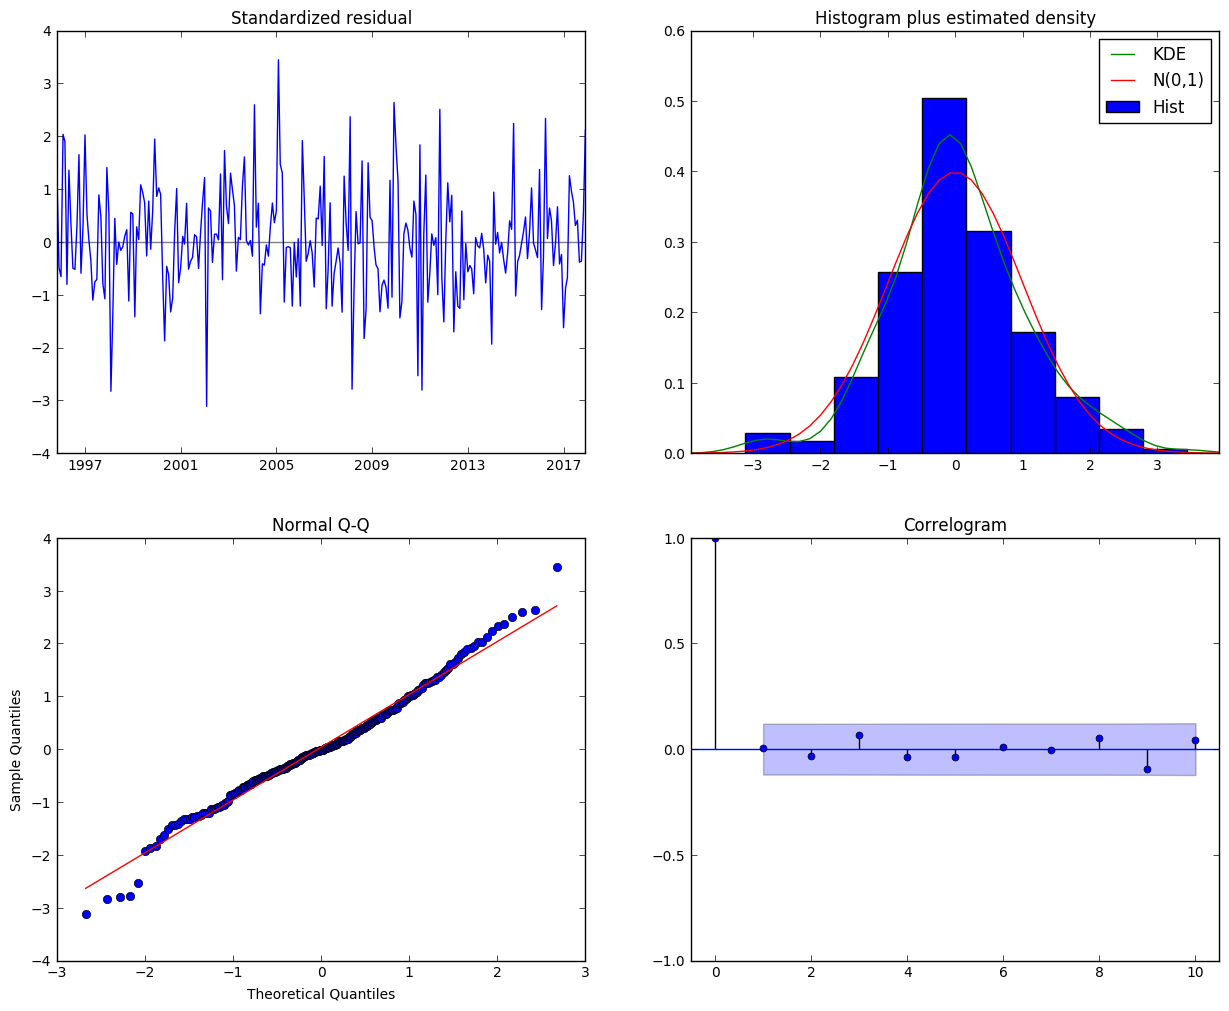

In [551]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

The diagnostics plots show that the residuals are normally distributed and correlogram shows that the autocorrelations 
are mimimum.

In [552]:
pred = results.get_prediction(start='2011-01-31',dynamic=False)
pred_ci = pred.conf_int()

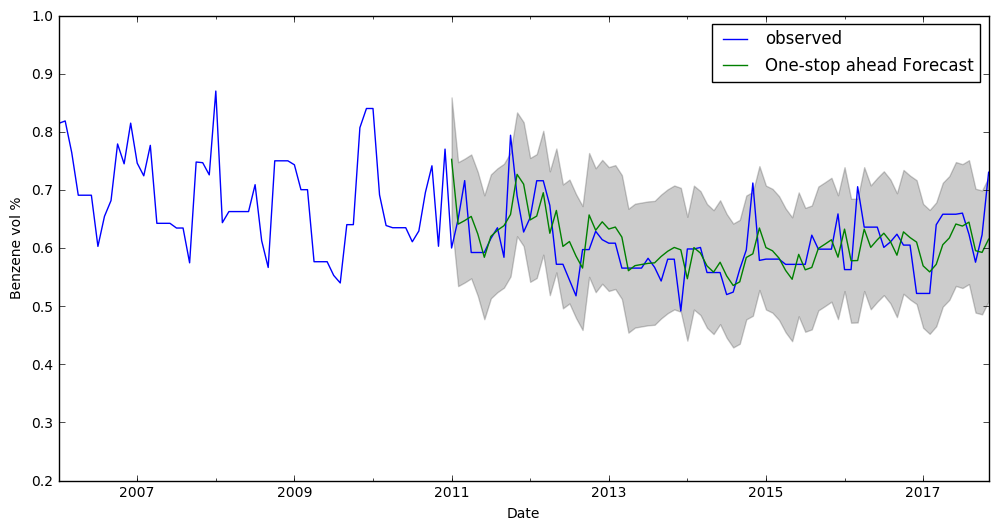

In [553]:
plt.figure(figsize=(12,6))

ax = Ben_model_Data['2006':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-stop ahead Forecast', alpha=1)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Benzene vol %')

plt.ylim(0.2,1)
plt.legend()
plt.show()

In [554]:
rms = sqrt(mean_squared_error(pred.predicted_mean, Ben_test_Data))
print(rms)

0.049878427367642794


In [555]:
pred_dynamic= results.get_prediction(start='2011-01-31',dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

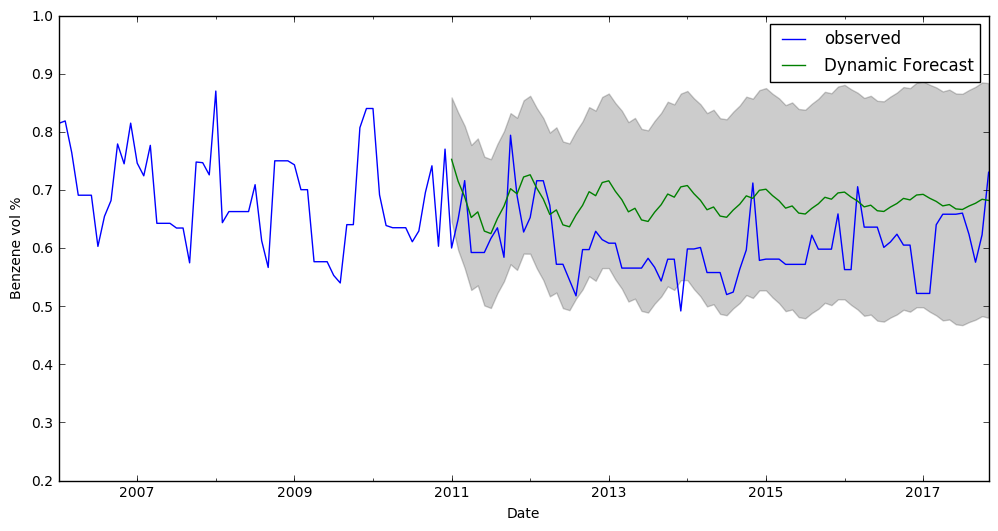

In [556]:
plt.figure(figsize=(12,6))

ax = Ben_model_Data['2006':].plot(label='observed')
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:,0], pred_dynamic_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Benzene vol %')

plt.ylim(0.2,1)
plt.legend()
plt.show()

In [557]:
rms = sqrt(mean_squared_error(pred_dynamic.predicted_mean, Ben_test_Data))
print(rms)

0.09168453702301263


In [558]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

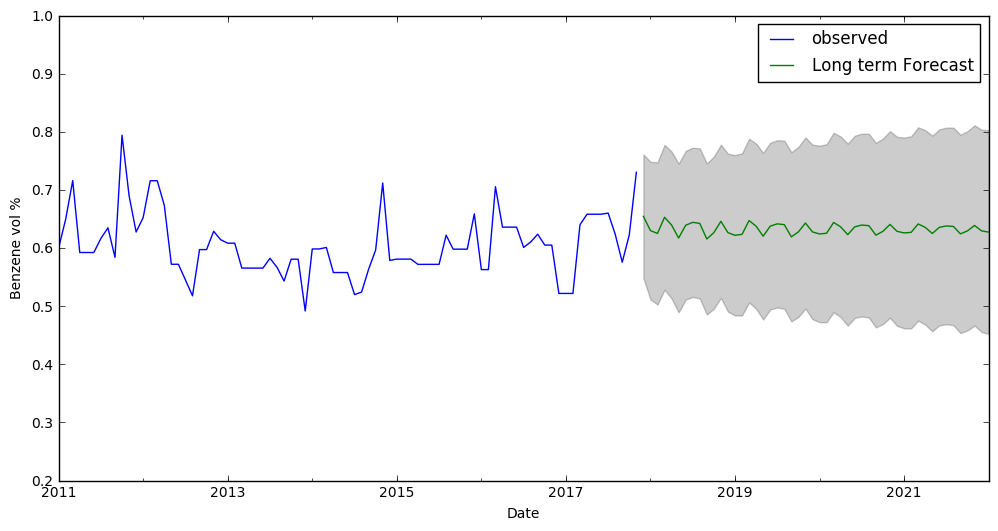

In [559]:
plt.figure(figsize=(12,6))

ax = Ben_model_Data['2011':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Long term Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Benzene vol %')

plt.ylim(0.2,1)
plt.legend()
plt.show()